## Skating Score Project

### Introduction: 

   Historically, figure skating has been a sport inwhich the United States has greatly excelled in the Olympic Winter Games. Sports that are judged on both technical merit and artisitc expression are challenging to judge objectively and figure skating is no exception. In 2004, the previous highly subjective figure skating scoring system was replaced with the International Judging System(IJS) which takes into account the minutiae of every skating program awarding a specific point value based on multiple calculations. Following this change, the United States has seen a drastic decrease in international accomplishment for women skaters representing the USA. 

   The recently 2022 Olympic winter games in Beijing marks 4 consecutive Olympics inwhich the US women have not been awarded a medal. Many critics of current state of international figure skating suggest that the medal drought is directly related to Russian domianance in womens figure skating. Russian figure skating has been under scrutiny for their questionable training tactics and with a recently doping scandal at the 2022 Beijing Olympics, it's more than reasonable for all other skating federations to reject Russian figure skating training tactics and put the wellbeing of athletes ahead of competitive victories However, can the 15 year medal drought be completed contributed to this? 

   In the four most recent Winter Olympic Games, at least one of the women figure skating medals has gone to an athlete from Japan, South Korea, Italy, or Canada. It's also worth noting that the United States is continuing to excel greatly in most figure skating disciplines (especially mens and ice dancing). This project is a data-driven alaysis of this project inwhich I explore trends that may offer insights to improve US womens figure skating scores at the Olympic Games. 

### Project Goals:

- Construct a machine learning regression model that improves predicted Olympic scores of women figure skaters under the International Judging System (implemented in 2004).
- Find the key drivers of Olympic event scores by anaylizing competition data of athletes prior to their Olympic performances.
- Empower US figure skating athletes and coaches with information that may lead to positive training modifications.
- Thoroughly document the process and key findings.
- Prove the potentiality of utilizing the data science pipeline to better the sport of figure skating.

### Summary of Findings & Recommendations:

- My analysis indicates that the top drivers of Olympic Scores are:
     > - Athlete's 4 year international competitive history preceding the Olympics
     > - Short Program Event Scores (components and elements)
     > - Free Program Event Scores (components and elements)
     > - Event placements
     > - competitive season

- My data exploration revealed that USA athletes' scores are lower than desired due to :
     > - USA athletes have a lower margin of score improvment over the last 15 years compared to non-USA athletes
     > - The elements portion of free program shows the worst margin of improvment for USA athletes 
     > - USA athletes still slightly outscore non-USA athletes in the components score, but if the trend over the last 15 years continues, USA athletes may fall behind in this category as well
     > - USA athletes' element scores seem to be more problematic in the free program. Because the free program is longer than the short program, lack of athletic endurance is one possible explanation to explain this discrepancy.

- Interestingly, the skater's 4 year average amount of technical jumping errors did not seem to be a factor contributing to Olympic scores. 

- I built and trained a Generalized Linear Model(Tweedie Regressor) which is able to improve baseline predicted Olympic scores by approximately 50%.
 
- I can recommend employing this new model with reasonable confidence.

- I believe this project demonstrates great promise for the use of data science in improving training strategies and competition outcomes in US Figure Skating.

### Data Acquisition & Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import acquire
import prepare
import explore
import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from scipy import stats

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 300)
pd.options.display.max_seq_items = 2000

from IPython.display import Markdown, display
from IPython.core import display as ICD
import textwrap
import ipywidgets as widgets
from traitlets import Unicode, Dict
from pandas_profiling import ProfileReport
from IPython.core import display as ICD
import termcolor

np.random.seed(123)

In [2]:
df = acquire.get_competition_data()
# this is a user-defined function in acquire.py that pulls in selected data from skatingscores.com

In [ ]:
df.info()
# shows a snapshot of all data/columns that may potentially be used prior to data wrangling.

### Initial Data - 
I strategically acquired data on international-level women figure skaters over since 2004. In the next steps, I will label columns much more clearly so those without specific domain knowledge will be able understand this anaylsis much easier. TES, PCS, TSS, etc. are abbreviated parts of the skating score and as I acquired and joined the data together, we can see that there are many duplicate columns. Because the target variable is athletes' final Olympic score ("oly_event_score"), I am filtering out all records that do no belong to an Olympian. After this, there are 102 total records. One record represents a skater's olympic results from one of the five Winter Olympic Games between 2006-2022 and information about that skater's international competitive history the 4 years preceding said Olympics. It's important to note that there will be duplicate skater names in the database as some skaters have performed at more than one Olympics. 

Only major international events are included at this time as these are likely to be the most representive of how a skater may perform at the Olympics considering the high pressure environment. It is certainly possible to expand on this exploration and modeling process in the future by adding skaters' scores from national level competitions and additional international events. 

In [3]:
df = prepare.prepare_competition_data(df)
#user-defined function which wrangles and cleans data optimally for this project

In [ ]:
df.info()
#displays overview of the prepared dataframe 

### Profile Report

- This profile report is an in-depth analysis of all variables included in the dataframe. This is included to offer full transparency of the project data and process. 

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()
#generates a profile report and embeds the report as widgets for an interactive user experience

<script src=\"img/profile.html\" width=800 height=800 />

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


### In this project, events included are:

- Grand Prix Qualifiers (America, Canada, France, Japan, Russia, China)
- Grand Prix Final
- World Championships (because the World Championships take place after the Olympics in a given season, the world championship scores are included as taking place the season after they do. 
- Olympic Winter Games (specific competition data is included for the exploratory process only. The goal of modeling in this project is to predict Olympic scores based on competitive history so all Olympic data aside from the target variable will be dropped pre-modeling).

### Non-Olympic scores in the 4 year period preceding the Olympics have been averaged together for each record in the following categories:

- short program/free program/final event place
- short program/free program/final event score
- short program/free program/final components score
- short program/free program/final elements score
- average errors including deductions(falls and/or major error), under rotation jump error, costly jump error, major combination jump error, jump downgrade, illegal element, suspected errors, and all jump errors
- average difficult jumping elements including quads, triple axels, and triple triple (note- this accounts for attempted jumps only)

### Exploratory Data Analysis & Statistical Testing

- Create hypotheses regarding drivers of Olympic Event Scores.
- Split data into 3 subsets for proper statistical analysis and modeling.
- Use the train data to explore hypotheses.
- Visualize bivariate and/or multivariate data and assess hypotheses using statistical tests.

### Hypotheses & Exploration Plan:

> Jumping Difficulty- Based on basic domain knowledge, I believe skaters that demonstrate difficult jumping ability in international events will have higher Olympic score. While triple axels and quadruple jumps are not very common in womens figure skating, the point value for these elements is very high so executing one or more of these jumps in a program can really set the athlete apart. Triple-triple combinations, although much more common, are still not something all women Olympians can do with ease so I am considering it a "difficult jump" at this time. I create separate columns for these 3 difficult jumping elements to explore this hypothesis.

> USA athletes and technical scores- I hypothesize that USA skaters have lower technical/elements scores, especially compared to Olympic medals. I am curious to see how far behind USA skaters are to the top perfomers in this category and whether or not there appears to be a trend throughout the seasons.

> USA athletes and components scores - Historically, USA skaters have been known to have strong "presentation." Under the former scoring system, the "presentation score" was closest to what the components score is currently, yet the components score is calculated with more objective criteria. Do USA athletes have an edge in the components score as they did in the presentation score? While I did not acquire old scores prior to 2004 for this project, I will compared components scores by country groupings to see where USA athletes stand. 

### Splitting Data

Splitting data into 3 subsets (train, validate, test) for proper statistical analysis, exploration, modeling, and assessment.
- Train: explore features and relationships to target variable, statistical analysis, build models 
- Validate: evaluate model performance compared to the train dataset, Assess potential overfitting
- Test: run only the chosen top performing to ensure model performs as expected on unseen data before employing

In [4]:
train, validate, test = prepare.split_data(df)
# Function that plits data into 3 subsets: train, validate, test. Random state specifying that data is split
# with the exact same records when the code is re-run (useful for exploration and modeling, yet
# I suggest dropping this when employing the model)

**number of train records: 56**

**number of validate records: 25**

**number of test records: 21**

### Feature Correlation (contiuous variables) to Olympic event score

In [ ]:
train.drop(['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'oly_event_score'], axis=1).corrwith(train['oly_event_score'], method='pearson').sort_values().plot(kind='barh', grid=True, figsize=(15,12), color='salmon')
plt.title("Correlation with target", fontweight='bold', size=20)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.show()
# graphs the correlation strength of features to the target variable

### Feature Correlation to Olympic Score Anaylsis
Interestingly, most jumping errors do not seem to be highly correlated with Olympic scores. While further analysis is needed, it's possible that taking technical risks could pay off. Actually, suspected errors are positively correlated with Olympic scores. Suspected errors do not include a mandatory deduction, but I'm very curious why we'd see a any positive correlation here. Based on this graph, the only specific jumping attribute that shows a useful correlation to Olympic scores is average quad attempts. Very few women figure skaters have attemped quads in international competition and those that have attempted them have tended to be very technically advanced skaters so this correlation is not surprising. If anything, I'd expect the correlation to be higher. The triple axel is another jump that only a handful of advanced women skaters attempt and/or complete so it's surprising that there's such a weak correlation with Olympic scores. However, as mentioned, the advanced jump columns take attempts and not necessarily successful completion into account so it's probable that the correlation would look different if looking at these jumps landed cleanly only. Breaking these features down further in such ways is very possible with advanced (and more timely) data wrangling which I plan on pursuing shortly.

### Creating Columns to Separate USA athletes for exploration

In [5]:
train["top"] = train["country"].apply(lambda country: explore.top_score(country))
#uses pre-defined user function to create a column specifying if the record/skater is from a the USA, a country that
#has medaled in Womens Figure Skating Olympics since 2006, or all other countries
train["usa"] = train["country"].apply(lambda country: explore.usa_score(country))
#uses pre-defined user function to create a column specifying if the record/skater is from a the USA or not

### Graphing Correlation of Features to Target Variable through the lens of USA/Top Performing Countries/Other

In [ ]:
X1 = train[['event_final_place', 'event_score', 'short_place', 'short_score', 'short_elements_score',  'short_components_score', 'free_place', 'free_score', 'free_elements_score', 'free_components_score']]
#creates df of Average Scores & Placements
fig = plt.figure(1, figsize=(16,16))
plt.title('Average Scores & Placements Grouped By Top Performing Countries', size=20, pad=40)
for i, col in enumerate(X1.columns, 1): #loops through columns in df to plot said columns with target variable
    fig.add_subplot(4,3,i)
    sns.scatterplot(x=col, y='oly_event_score', data=train, hue='top', palette='gnuplot2_r')
    plt.legend(fontsize=8, loc='best')
    plt.title(col, size=15)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

plt.rcParams["axes.grid"] = False
plt.show(1)

In [ ]:
X2 = train[['event_deductions', 'free_deductions', 'short_deductions', 'under_rotations', 'downgrades', 'edge_error', 'combo_no_credit', 'illegal_element', 'jump_errors_all', 'jump_errors_costly', 'suspected_edge_error', 'suspected_rotation_error']]
#creates df of Average Jump Errors in non-Olympic Events
fig = plt.figure(1, figsize=(16,16))
plt.title('Average Jump Errors in non-Olympic Events Grouped By Top Performing Countries', size=20, pad=40)
for i, col in enumerate(X2.columns, 1):  #loops through columns in df to plot said columns with target variable
    fig.add_subplot(4,3,i)
    sns.scatterplot(x=col, y='oly_event_score', data=train, hue='top', palette='gnuplot2_r')
    plt.legend(fontsize=8, loc='best')
    plt.title('Error Type: ' + col, size=15)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

plt.rcParams["axes.grid"] = False
fig.show()

In [ ]:
X3 = train[['triple_triple', 'triple_axel', 'quad']]
#creates df of Average Difficult Jumps in non-Olympic Events
fig = plt.figure(1, figsize=(18,4))
plt.title('Average Difficult Jumps in non-Olympic Events Grouped By Top Performing Countries', size=20, pad=40)
for i, col in enumerate(X3.columns, 1): #loops through columns in df to plot said columns with target variable
    fig.add_subplot(1,3,i)
    sns.scatterplot(x=col, y='oly_event_score', data=train, hue='top', palette='gnuplot2_r')
    plt.legend(fontsize=8, loc='best')
    plt.title('Error Type: ' + col, size=15)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

plt.rcParams["axes.grid"] = False
fig.show()

In [ ]:
explore.scores_season(train)
#pre-defined user function that displays mean scores in dataframes grouped by country data for comparison

### Analysis of USA scores vs. Top Scores vs. Other Scores

Even when exluding Russia, the top performing skaters AND skaters that did not make the Olympic podium have a consistent increase across all categories where the US skaters have not(looking at mean scores). On average, US skaters are very competitive in the program components and short elements scores, but seem to lose with the free elements. One possible explanation could be endurance training. US skaters seem to be competitive in the short program both with elements and program components. This could mean that US skaters don't necessary lack technical abilities, but because the free program is longer and typically has 7 jumping elements (as opposed to 3 in the short program), endurance could possibly explain this. It would be interesting to break down the elements performed in the program and if there is a trend that may give more insight to this thoery.

### Graphing Relationship of Season to Target Variable through the lens of USA/Top Performing Countries/Other

In [ ]:
sns.set_palette('Set2', 20)
# sets colors for graph
sns.lmplot(x='season', y='oly_event_score', data=train, scatter=True, hue='top', col=None, height=5.5, aspect=8.7/5.5)
plt.title("Olympic Scores Compared to Season")

In [ ]:
explore.plot_scores(train)
#pre-defined user function that plots the relationship of the first Olympic season under the IJS scoring system  
#and the most recent Olympics to scores grouping by country data

### Statistical Testing
- Utilizing ANOVA and/or T- test to determine if there is a difference between the target variable and country groups

In [ ]:
usa_score = train[train.top == 'usa'].oly_event_score
top_score = train[train.top == 'top'].oly_event_score
other_score = train[train.top == 'other'].oly_event_score
#create 3 seperate dfs in preparation for ANOVA test

In [ ]:
print(usa_score.var())
print(top_score.var())
print(other_score.var())
#shows variance of target variable in the 3 seperate groupings

### 2-sample, independent t-test
- Looking at the variances, they are very different, so I will move to a 2-sample, independent t-test comparing one subgroup to all other records.
- alpha = .05

$H_0$: There is not a noteable difference between mean Olympic scores of USA athletes and all other athletes.

$H_a$ : There is a noteable difference between mean Olympic scores of USA athletes and all other athletes.

In [ ]:
alpha = .05 #sets alpha
usa_score = train[train.top == 'usa'].oly_event_score
other_score = train[train.top != 'usa'].oly_event_score
t, p = stats.ttest_ind(usa_score, other_score, equal_var=False)
#runs ind t-test
if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

$H_0$: There is not a noteable difference between mean Olympic scores of athletes from top performing countries and all other athletes.

$H_a$ : There is a noteable difference between mean Olympic scores of athletes from top performing countries and all other athletes.

In [ ]:
top_score = train[train.top == 'top'].oly_event_score
other_score = train[train.top != 'top'].oly_event_score
t, p = stats.ttest_ind(top_score, other_score, equal_var=False)
#runs ind t-test
if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")


$H_0$: There is not a noteable difference between mean Olympic scores of athletes from non-top performing countries nor the USA and all other athletes.

$H_a$ : There is a noteable difference between mean Olympic scores of athletes from non-top performing countries nor the USA and all other athletes.

In [ ]:
other_score = train[train.top == 'other'].oly_event_score
top_or_usa_score = train[train.top != 'other'].oly_event_score
t, p = stats.ttest_ind(top_or_usa_score, other_score, equal_var=False)
#runs ind t-test
if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

### T-Test Anaylsis : 
-There does appear to be a statistically significant difference of top performing countries to all others and non-top, non-USA to others, but not USA to others. This may be due to the USA performing very medicorely and blending in with others or potentially, this may be due to USA athletes differing greatly in competiteness from 2006 to 2022.  

### Pearsons R Correlation Tests
- Because there seem to be several continuous features correlated to the target, I am looping through continuous columns to determine which features have a statistically significant correlation with the target

In [6]:
explore.corr_tests(train)
#runs correlation test on all continous features (with the exception of features that are influenced by the target)

Null Hypothesis: There is no correlation between between the Olympics event score and event_final_place
Alternative Hypothesis : There is a correlation between between the Olympics event score and event_final_place 


<span style='color:None'>*We reject the null hypothesis. correlation strength: -0.58*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and short_score
Alternative Hypothesis : There is a correlation between between the Olympics event score and short_score 


<span style='color:None'>**We reject the null hypothesis. HIGH CORRELATION strength: 0.85**</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and short_place
Alternative Hypothesis : There is a correlation between between the Olympics event score and short_place 


<span style='color:None'>*We reject the null hypothesis. correlation strength: -0.56*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and free_score
Alternative Hypothesis : There is a correlation between between the Olympics event score and free_score 


<span style='color:None'>**We reject the null hypothesis. HIGH CORRELATION strength: 0.85**</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and free_place
Alternative Hypothesis : There is a correlation between between the Olympics event score and free_place 


<span style='color:None'>*We reject the null hypothesis. correlation strength: -0.58*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and event_score
Alternative Hypothesis : There is a correlation between between the Olympics event score and event_score 


<span style='color:None'>**We reject the null hypothesis. HIGH CORRELATION strength: 0.85**</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and short_elements_score
Alternative Hypothesis : There is a correlation between between the Olympics event score and short_elements_score 


<span style='color:None'>**We reject the null hypothesis. HIGH CORRELATION strength: 0.8**</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and short_elements_rank
Alternative Hypothesis : There is a correlation between between the Olympics event score and short_elements_rank 


<span style='color:None'>*We reject the null hypothesis. correlation strength: -0.48*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and short_components_score
Alternative Hypothesis : There is a correlation between between the Olympics event score and short_components_score 


<span style='color:None'>**We reject the null hypothesis. HIGH CORRELATION strength: 0.85**</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and short_components_rank
Alternative Hypothesis : There is a correlation between between the Olympics event score and short_components_rank 


<span style='color:None'>*We reject the null hypothesis. correlation strength: -0.55*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and free_elements_score
Alternative Hypothesis : There is a correlation between between the Olympics event score and free_elements_score 


<span style='color:None'>**We reject the null hypothesis. HIGH CORRELATION strength: 0.81**</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and free_elements_rank
Alternative Hypothesis : There is a correlation between between the Olympics event score and free_elements_rank 


<span style='color:None'>*We reject the null hypothesis. correlation strength: -0.53*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and free_components_score
Alternative Hypothesis : There is a correlation between between the Olympics event score and free_components_score 


<span style='color:None'>**We reject the null hypothesis. HIGH CORRELATION strength: 0.85**</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and free_components_rank
Alternative Hypothesis : There is a correlation between between the Olympics event score and free_components_rank 


<span style='color:None'>*We reject the null hypothesis. correlation strength: -0.58*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and free_deductions
Alternative Hypothesis : There is a correlation between between the Olympics event score and free_deductions 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and short_deductions
Alternative Hypothesis : There is a correlation between between the Olympics event score and short_deductions 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and event_deductions
Alternative Hypothesis : There is a correlation between between the Olympics event score and event_deductions 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and under_rotations
Alternative Hypothesis : There is a correlation between between the Olympics event score and under_rotations 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and downgrades
Alternative Hypothesis : There is a correlation between between the Olympics event score and downgrades 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and edge_error
Alternative Hypothesis : There is a correlation between between the Olympics event score and edge_error 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and suspected_edge_error
Alternative Hypothesis : There is a correlation between between the Olympics event score and suspected_edge_error 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and suspected_rotation_error
Alternative Hypothesis : There is a correlation between between the Olympics event score and suspected_rotation_error 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and combo_no_credit
Alternative Hypothesis : There is a correlation between between the Olympics event score and combo_no_credit 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and illegal_element
Alternative Hypothesis : There is a correlation between between the Olympics event score and illegal_element 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and jump_errors_all
Alternative Hypothesis : There is a correlation between between the Olympics event score and jump_errors_all 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and jump_errors_costly
Alternative Hypothesis : There is a correlation between between the Olympics event score and jump_errors_costly 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and triple_triple
Alternative Hypothesis : There is a correlation between between the Olympics event score and triple_triple 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and quad
Alternative Hypothesis : There is a correlation between between the Olympics event score and quad 


<span style='color:None'>*We reject the null hypothesis. correlation strength: 0.47*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and triple_axel
Alternative Hypothesis : There is a correlation between between the Olympics event score and triple_axel 


<span style='color:red'>*We fail to reject the null hypothesis*</span>

-------------------------------------

Null Hypothesis: There is no correlation between between the Olympics event score and season
Alternative Hypothesis : There is a correlation between between the Olympics event score and season 


<span style='color:None'>*We reject the null hypothesis. correlation strength: 0.56*</span>

-------------------------------------



### Correlation Test Anaylsis: 
- These correlation tests are very useful in deciding which features I will use in modeling. I am cutting the statisical significance off at .4 at this time and will go ahead and use all features that have a 40% or greater correlation to the target (minus features that are directly influenced by the target- ie.other portions of the Olympic score) 

### Modeling (Regression)

- In preparation for modeling, I will reset the index of the 3 dataframes (needed step as there are duplicate names due to some skaters going to more than one Olympics)

In [7]:
train = train.reset_index()
validate = validate.reset_index()
test = test.reset_index()
#resets index
train = train.drop(columns=['index'])
validate = validate.drop(columns=['index'])
test = test.drop(columns=['index'])
#drops unnessary column

- Splitting all 3 datasets into X and y subsets 

In [8]:
X_train = train.drop(columns=['combo_no_credit', 'free_deductions' , 'short_deductions',  'event_deductions', 'under_rotations', 'downgrades' , 'edge_error', 'suspected_edge_error', 'suspected_rotation_error',
'illegal_element' ,'jump_errors_all' ,'jump_errors_costly', 'triple_triple', 'triple_axel', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'top', 'country', 'usa'])
# creates dataframe that drops all column except the selected features for modeling
y_train = train[['oly_event_score']]
# creates dataframe of target variable (y) only

X_validate = validate.drop(columns=['combo_no_credit', 'free_deductions' , 'short_deductions',  'event_deductions', 'under_rotations', 'downgrades' , 'edge_error', 'suspected_edge_error', 'suspected_rotation_error',
'illegal_element' ,'jump_errors_all' ,'jump_errors_costly', 'triple_triple', 'triple_axel', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score','country'])
y_validate = validate[['oly_event_score']]
# repeat above for validate set

X_test = test.drop(columns=['combo_no_credit', 'free_deductions' , 'short_deductions',  'event_deductions', 'under_rotations', 'downgrades' , 'edge_error', 'suspected_edge_error', 'suspected_rotation_error',
'illegal_element' ,'jump_errors_all' ,'jump_errors_costly', 'triple_triple', 'triple_axel', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'country'])
y_test = test[['oly_event_score']]

- Scaling data in prepation for modeling

In [9]:
scaler = sklearn.preprocessing.StandardScaler()
# employs the standars scaler
scaler.fit(X_train)
# inserts the selected features into the scaler

X_train = data=scaler.transform(X_train)
X_validate = data=scaler.transform(X_validate)
X_test = data=scaler.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)
#reassigns dataframes with scaled data

- Establishing Baseline RMSE

In [11]:
y_train['pred_mean'] = y_train.oly_event_score.mean()
train['pred_mean'] = train.oly_event_score.mean()
y_validate['pred_mean'] = y_validate.oly_event_score.mean()
y_test['pred_mean'] = y_test.oly_event_score.mean()
# calculates mean prior to computing rmse

rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_mean)**(1/2)
# computes baseline RMSE for train and validate sets (square root of MSE)

print("Baseline RMSE\nTrain/In-Sample: ", round(rmse_train, 2)), 
print("Baseline RMSE\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

Baseline RMSE
Train/In-Sample:  31.26
Baseline RMSE
Validate/Out-of-Sample:  29.03


### Linear Regression Model

In [12]:
lm = LinearRegression(normalize=True)
# create the model

lm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['value_predict_lm'] = lm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.value_predict_lm)**(1/2)
# computes model rmse

y_validate['value_predict_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.value_predict_lm)**(1/2)
# comutes predictions and rmse with validate data

print("**OLS Linear Regression Performance**")
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nValidation/Out-of-Sample: ", round(rmse_validate, 2))

**OLS Linear Regression Performance**
---------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  11.16
---------------------------------------
RMSE for OLS using LinearRegression
Validation/Out-of-Sample:  17.84


- The linear regression model shows a great reduction in RMSE, but I am skeptical of overfitting here. Especially with a somewhat small dataset, I'm really looking for similar RMSE scores for in sample and out of sample data

### Lasso Lars Regression Model

In [20]:
lars = LassoLars(alpha=1)
# creates the model

lars.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_lars'] = lars.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_lars)**(1/2)
# computes model rmse

y_validate['pred_lars'] = lars.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_lars)**(1/2)
# comutes predictions and rmse with validate data

print("**LARS Performance**")
print("---------------------------------------")
print("RMSE for Lars\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for Lars\nOut-of-Sample: ", round(rmse_validate, 2))

**LARS Performance**
---------------------------------------
RMSE for Lars
Training/In-Sample:  17.19
---------------------------------------
RMSE for Lars
Out-of-Sample:  18.07


- The lasso lars regression model looks great when it comes to overfitting. This model performs better than baseline and should definitely be considered.

### Generalized Linear Model : Tweedie Regressor

In [19]:
glm = TweedieRegressor(power= 2, alpha=3)
# creates the model

glm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_value_glm'] = glm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_value_glm)**(1/2)
# computes model rmse

y_validate['pred_value_glm'] = glm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_value_glm)**(1/2)
# comutes predictions and rmse with validate data

print("**Generalized Linear Model Performance**")
print("---------------------------------------")
print("RMSE for GLM /In-Sample: ", round(rmse_train, 2)), 
print("---------------------------------------")
print("RMSE for GLM \nValidation/Out-of-Sample: ", round(rmse_validate, 2))

**Generalized Linear Model Performance**
---------------------------------------
RMSE for GLM /In-Sample:  15.86
---------------------------------------
RMSE for GLM 
Validation/Out-of-Sample:  17.92


- The GLM Tweedie Regressor has the lowest RMSE values collectively for in sample and out of sample data. There is difference of 2 between the RMSE values so I am considering whether or not overfitting is present here. Because there is also a difference of 2 in the baseline RMSEs of train and validate, I think it's reasonable to accept this slight difference as normal and not likely due to overfitting. Taking all into considering, I am choosing the GLM model as the superior model at this time. 

### Chosen Model: GLM Tweedie Regressor 
- Running model with Test data to confirm performance

In [22]:
y_test['pred_value_glm'] = glm.predict(X_test)
rmse_test = mean_squared_error(y_test.oly_event_score, y_test.pred_value_glm)**(1/2)

print("**Generalized Linear Model Performance on Test Data**")
print("---------------------------------------")
print("RMSE : Test Data \nTesting/Out-of-Sample: ", round(rmse_test, 2))

**Generalized Linear Model Performance on Test Data**
---------------------------------------
RMSE : Test Data 
Testing/Out-of-Sample:  16.43


- The RMSE of test is in the middle of that of train and validate which is a great sign regarding the model's performance. 

In [23]:
train['predictions'] = glm.predict(X_train)
validate['predictions'] = glm.predict(X_validate)
test['predictions'] = glm.predict(X_test)
#creates columns on dataframes with glm predictions

### Plotting Model Predictions

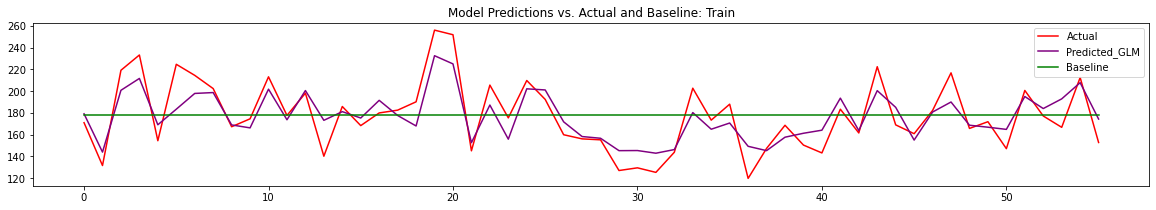

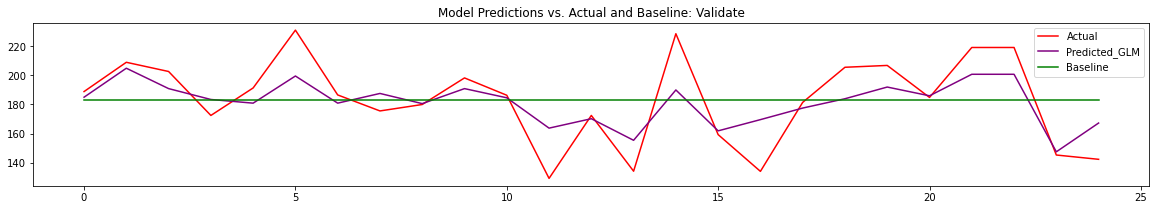

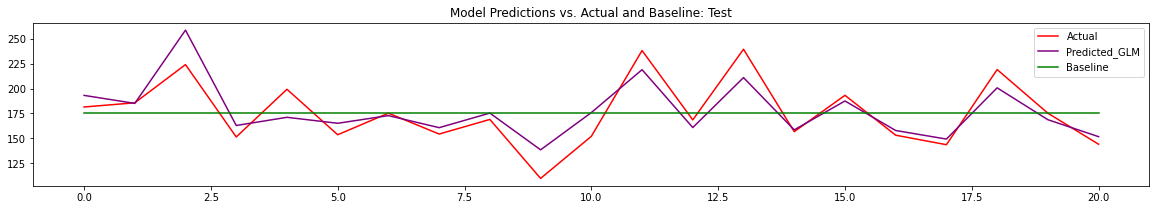

In [31]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax1 = plt.subplots()
ax1.plot(train.oly_event_score, color='red', label='Actual')
ax1.legend()

ax1.plot(train.predictions , color='purple', label='Predicted_GLM')
ax1.legend()

ax1.plot(train.pred_mean , color='green', label='Baseline')
ax1.legend()
plt.title('Model Predictions vs. Actual and Baseline: Train')
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(validate.oly_event_score, color='red', label='Actual')
ax2.legend()

ax2.plot(validate.predictions , color='purple', label='Predicted_GLM')
ax2.legend()

ax2.plot(y_validate.pred_mean , color='green', label='Baseline')
ax2.legend()
plt.title('Model Predictions vs. Actual and Baseline: Validate')
plt.show()

fig, ax3 = plt.subplots()
ax3.plot(test.oly_event_score, color='red', label='Actual')
ax3.legend()

ax3.plot(test.predictions , color='purple', label='Predicted_GLM')
ax3.legend()

ax3.plot(y_test.pred_mean , color='green', label='Baseline')
ax3.legend()
plt.title('Model Predictions vs. Actual and Baseline: Test')
plt.show()
#plots baseline, actual, and model predictions of all 3 dataframes

- this graph demonstrates that the modeling process was successful and is exponentially better than baseline predictions

### Conclusion

- I successfully created a machine learning regression model that improves predicted Olympic scores of women figure skaters with a 50% improvement from baseline predictions.

- My analysis indicates that the top drivers of Olympic Scores are:
     > - Athlete's 4 year international competitive history preceding the Olympics
     > - Short Program Event Scores (components and elements)
     > - Free Program Event Scores (components and elements)
     > - Event placements
     > - competitive season

- My data exploration revealed that USA athletes' scores are lower than desired due to :
     > - USA athletes have a lower margin of score improvment over the last 15 years compared to non-USA athletes
     > - The elements portion of free program shows the worst margin of improvment for USA athletes 
     > - USA athletes still slightly outscore non-USA athletes in the components score, but if the trend over the last 15 years continues, USA athletes may fall behind in this category as well
     > - USA athletes' element scores seem to be more problematic in the free program. Because the free program is longer than the short program, lack of athletic endurance is one possible explanation to explain this discrepancy.

- Interestingly, the skater's 4 year average amount of technical jumping errors did not seem to be a factor contributing to Olympic scores. 

### Next Steps for Improving Predictions

- I believe this project demonstrates great promise for the use of data science in improving training strategies and competition outcomes in US Figure Skating and I'm very excited to uncover this potential.

- Next, I'll expand on this project by undertaking a similar exploration and modeling approach, but use data that is more training based instead of just competition data (ie. skaters' coaching team, location, training methods, etc.)

- My ultimate goal is to build a model for coaches and skaters that will take into account a skater's element consistency and supply "ideal program content" - the elements that a skater should put in the program to maximize scoring potential based on a reasonab
     
- Explore additional home features, renovations, etc. that may drive tax assessed value
- Continue to evaluate and improve current model as new data becomes available




- I built and trained a Generalized Linear Model(Tweedie Regressor) which is able to improve baseline predicted Olympic scores by approximately 50%.
 
- I can recommend employing this new model with reasonable confidence.

